## 1. Download the Data

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets", filter="data")
    return pd.read_csv("datasets/housing/housing.csv")

housing_full = load_housing_data()

## Take a Quick Look at the Data Structure

In [2]:
housing_full.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 3. Get a quick description of the data (total number of rows, each attribute's type, and the number of non-null values

In [3]:
housing_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 4. Find out what categories exist and how many districts belong to each 'ocean_proximity' category

In [4]:
housing_full["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## 5. Show a summary of the numerical attributes

In [5]:
housing_full.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 6. Plot histograms for each numerical attribute (get a feel of the type of data). Number of instances on the vertical (y) axis

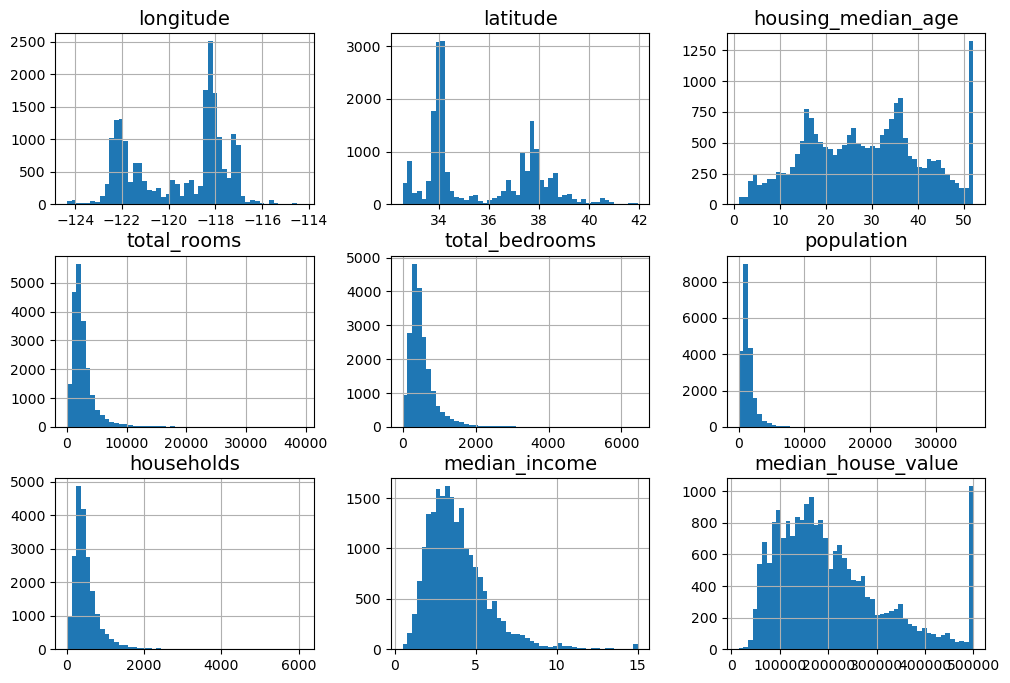

In [6]:
import matplotlib.pyplot as plt

# extra code: the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing_full.hist(bins=50, figsize=(12, 8))
plt.show()

## 7. Create a Test Set
To avoid data snooping bias, create a test set now, by picking some instances randomly, typically 20% of the dataset (or less if the dataset is very large), and set them aside. When generalisation error is estimated using the test sem the estimate could be too optimistic.

## I. Random Sampling

### a) Set the random number generator's seed (e.g, seed=42 to the default_rng() function.
However, this solution will break the next time an updated dataset is fetched.

In [7]:
import numpy as np

# Create a function that randomly splits the data into training and testing 
# sets. This function shuffles the data randomly, then divides it into
# training and test sets (80-20%)
def shuffle_and_split_data(data, test_ratio, rng):
    shuffled_indices = rng.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] 


# Call the function
rng = np.random.default_rng()   # default random nomber generator.
                                # To run the same test set across the project
                                # and do not get another one.
train_set, test_set = shuffle_and_split_data(housing_full, 0.2, rng)
print(f'Train set num_values: {len(train_set)}')
print(f'Test set n of num_values: {len(test_set)}')

Train set num_values: 16512
Test set n of num_values: 4128


### b) Compute a hash of each intance's identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value
This ensures that the test set will remain consistent across multiple runs, even if the dataset is refreshed. The new test set will contain 20% of the new instances, but it will not contain any instance that was previoulsy in the training set.

In [8]:
# CRC32 is a checksum/hashing algorithm that is very commonly used in 
# kernels and for Internet checksums. There are two common polynomials 
# in use: CRC32 uses 0x04c11db7 (inverted: 0xedb88320)
# --------------------------------------------------------------------
# Checksums are digital "fingerprints"—unique strings of letters and 
# numbers generated by algorithms (e.g., SHA-256, MD5) to verify data 
# integrity. By comparing a calculated checksum against a reference 
# value, they detect accidental data corruption during transmission 
# or storage. Even a minor change in the file produces a vastly 
# different checksum. 
from zlib import crc32
'''
- np.int64(identifier): Converts the identifier (row ID) to a 64-bit integer for hashing
- crc32(np.int64(identifier)): Hashes that integer, producing a number between 0 and 2^32 - 1 (about 4.3 billion)
- test_ratio * 2**32: Calculates the threshold. If test_ratio=0.2, this is 0.2 * 2^32 ≈ 858,993,459
- The comparison returns True if the hash falls below the threshold, False otherwise
'''
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32


def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# Unfortunately, the housing dataset does not have an identifier column.

### c) Use the row index as the ID
This is because the housing data does not have an identifier column.

In [9]:
housing_with_id = housing_full.reset_index() # adds and 'index' column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

### d) Combine district's latitude and longitude the most stable features and guaranteed permanent attributes for each instance.
This is to make sure that new data gets appended to the end of the dataset and that no row ever gets deleted.

In [10]:
'''
longitude * 1000 + latitude converts 2D coordinates into a 1D ID by:

- Scaling longitude (multiply by 1000) to separate it from latitude
- Adding latitude to combine both into one number
- Creating a unique-ish identifier per location for the hash function
'''
housing_with_id["id"] = (housing_full["longitude"] * 1000
                         + housing_full["latitude"])
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

### *e) Create Test Set by using Scikit-Learn's train_test_split()
First, there is a random_state parameter which allows to set the random generator seed.
Second, it is possible to pass it multiple datasets with identical number of rows, and it will split them on the same indices (e.g., if there is a separate DataFrame for labels.

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_full, test_size=0.2,
                                       random_state=42)

## II. Stratified Sampling

### a) Use 'pd.cut() function to create an income category attribute with 5 categories (labeled from 1 to 5)
Category 1 ranges from 0 to 1.5 (i.e, less than $15,000), category 2 from 1.5 to 3, and so on.

In [12]:
housing_full["income_cat"] = pd.cut(housing_full["median_income"],
                                    # np.inf: any income, no matter how large, 
                                    # falls into bin 5. It's a safety net for 
                                    # outliers.
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])

### b) Bar Plot of Income Categories

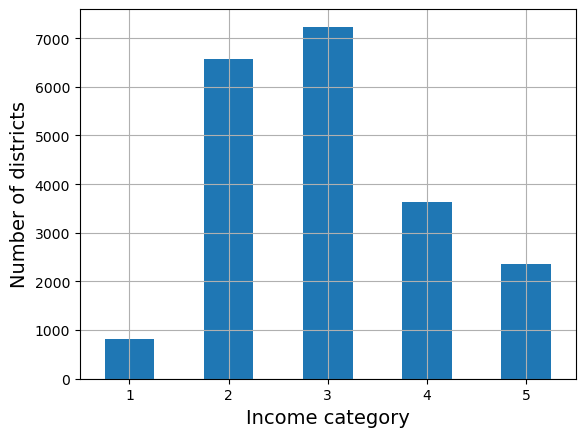

In [13]:
# Histogram of income categories.
cat_counts = housing_full["income_cat"].value_counts().sort_index()
cat_counts.plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

### c)Generate 10 different stratified splits of the same dataset
Having multiple splits can be useful to better estimate the performance of a model, such as during cross-validation (to be check later).

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

# Generate 10 different stratified splits of the same dataset
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing_full,
                                              housing_full["income_cat"]):
    strat_train_set_n = housing_full.iloc[train_index]
    strat_test_set_n = housing_full.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [15]:
# Use the first split
strat_train_set, strat_test_set = strat_splits[0]

In [16]:
# Since stratified sampling is fairly common, there's a shorter way to
# get a single split using the train_test_split() function with stratify 
# arguments.
strat_train_set, strat_test_set = train_test_split(
    housing_full, test_size=0.2, stratify=housing_full["income_cat"],
    random_state=42)

### d) Look at the income category proportions in the test set
Let's see if this worked as expected

In [17]:
# Check at the income category proportions in the test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

### e) Drop the `income_cat` column
It won't be used again

In [18]:
# The underscore naming set_ is just a convention. It indicates:
# This is a temporary/generic variable used in a loop.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 8. Explore and Visualise the Data to Gain Insights

In [19]:
# Since various transformations of the full training set will be tested,
# make a copy of the original so it's possible to revert it
housing = strat_train_set.copy()

### a) Visualising Geographical Data
Create a scatterplot of all the districts to visualise the data.

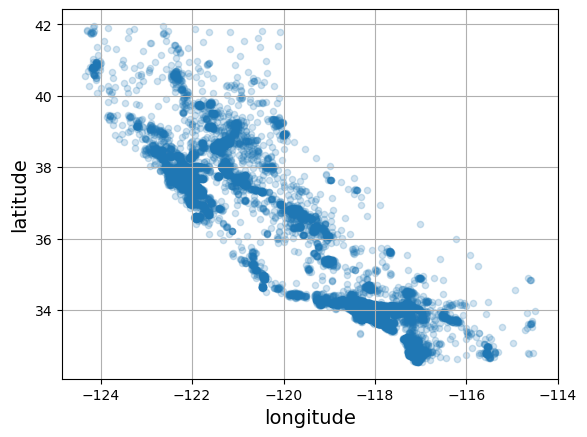

In [23]:
# Geographical scatterplot of the data
# By applying the `alpha` parameter to plot, it's possible to highlight
# high-density areas
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            alpha=0.2)
plt.show()

### b) Use a predefined colour map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

<Axes: xlabel='longitude', ylabel='latitude'>

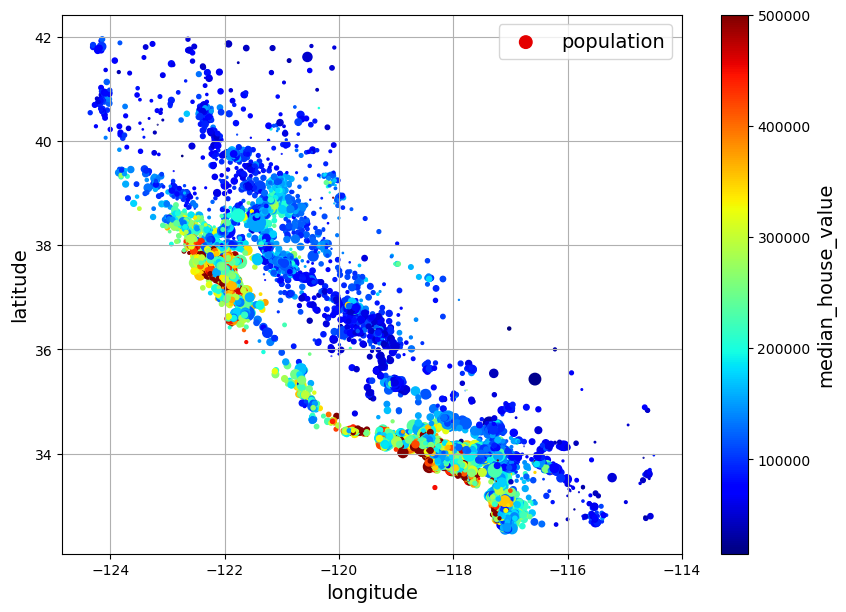

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
             

### c) Look for correlations
Since the dataset is not too large, compute the standard correlation coefficient (also called Pearson's r) btween every pair of numerical attributes using the corr() method.

In [25]:
corr_matrix = housing.corr(numeric_only=True)

In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

### d) Scatter Matrix: Plot every numerical attribute against every other numerical attribute.
Not to have 9^2 = 81 plots. Select the most promising attributes from the correlation_matrix regarding the median_house_value attribute.

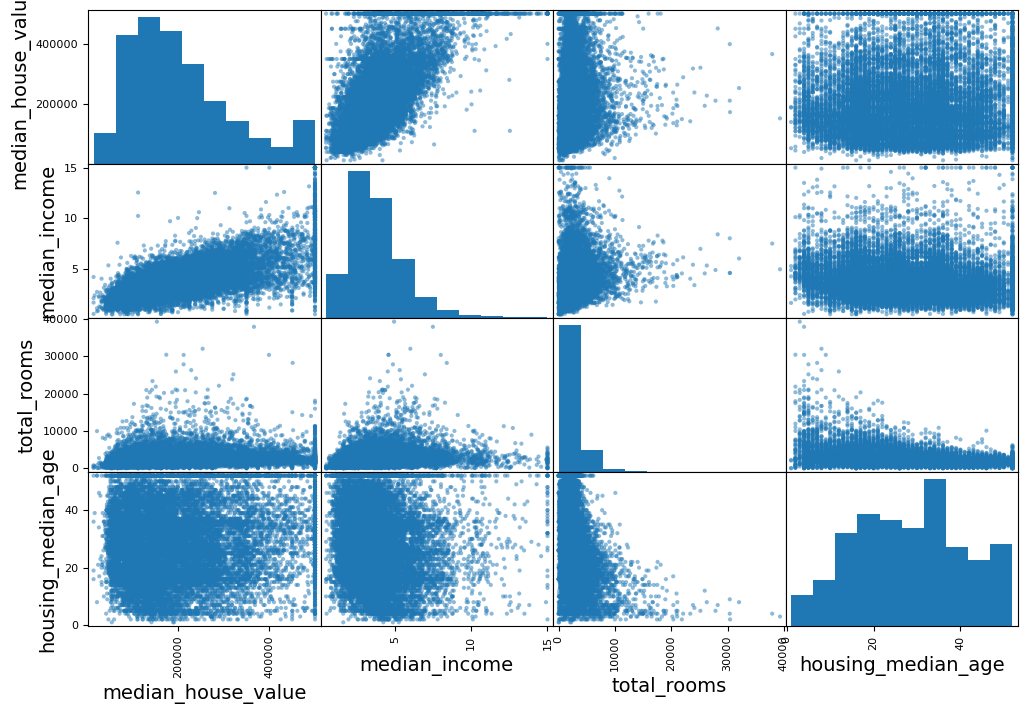

In [31]:
from pandas.plotting import scatter_matrix

# The next are attribute more correlated to the median_house_value
# attribute on the correlation_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

### e)